# **`Awake vs Drowsy Object Detection - YOLOv5`**

In [1]:
import torch
import uuid
import time
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Standard pre-trained model:

In [3]:
# Loading model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Using a custom image to see how it works:

image 1/1: 800x1280 20 cars, 1 bus, 2 trucks
Speed: 1068.0ms pre-process, 793.3ms inference, 35.5ms NMS per image at shape (1, 3, 416, 640)


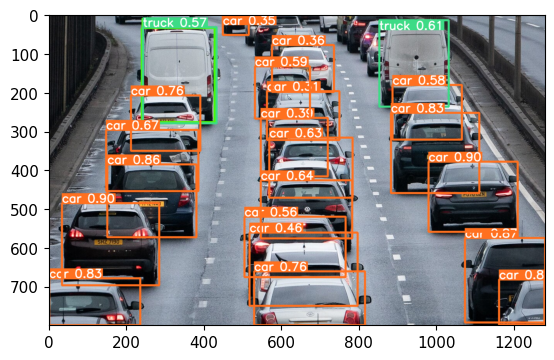

In [3]:
# Try and detect an image
img = 'https://www.telegraph.co.uk/content/dam/news/2023/01/15/TELEMMGLPICT000322063156_trans_NvBQzQNjv4BqpVlberWd9EgFPZtcLiMQf0Rf_Wk3V23H2268P_XkPxc.jpeg?imwidth=1280' 

results = model(img)
print(results)

%matplotlib inline
plt.imshow(np.squeeze(results.render()))

plt.show()

Feeding in my webcam to see what/if it detects:

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()

### **`Gathering Images`**

In [4]:
# custom images and labels

img_path = os.path.join('data', 'images')
labels = ['awake', 'drowsy']

# setting counters to adjust how many of each class to gather.
num_imgs_awake = 0
num_imgs_drowsy = 3

In [5]:
cap = cv2.VideoCapture(0)

# Loop through the labels
for label in labels:
    print('Collecting images for: {}'.format(label))
    time.sleep(5)

    num_imgs = num_imgs_awake if label == 'awake' else num_imgs_drowsy

    # Looping through images (num_imgs)
    for image in range(num_imgs):
        print('Collecting images for {}, image number {}'.format(label, image))

        # Webcam on
        ret, frame = cap.read()

        # Image path
        imgname = os.path.join(img_path, label + '.' + str(uuid.uuid1()) + '.jpg')

        # writing out img to file
        cv2.imwrite(imgname, frame)

        # Render to screen
        cv2.imshow('Image Collection', frame)

        time.sleep(2) # adding a slight delay so that we can take different shots

        if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
            break

cap.release()
cv2.destroyAllWindows()

: 

### **`Labelling Images`**

In [3]:
os.getcwd()

'/Users/oscaramirmansour/AwakeDrowsyObjDetec'

In [8]:
# Labelimg labeling repo
!git clone https://github.com/HumanSignal/labelImg.git

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [10]:
# Installing other dependencies
!pip3 install pyqt5 lxml --upgrade
!cd labelimg && pyrcc5 -o resources.py resources.qrc

### **`Training On Newly Labelled Images`**

Changing directory into the YOLOv5 folder and executing the training file on image size of 320, batch size of 16 and 5 epochs and we'll be training on the yolov5 model using Pytorch weights.

We'll be training on the dataset.yaml file.

In [2]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 100 --data /Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.11.6 torch-2.1.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

### **`Loading Initial Custom Trained Model`**

In [4]:
model_2 = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/runs/train/exp2/weights/last.pt')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [18]:
img_2 = os.path.join('data', 'images', 'drowsy.920aecf2-8a54-11ee-b275-784f434cfd22.jpg')

In [19]:
results = model_2(img_2)

In [20]:
print(results)

image 1/1: 720x1280 1 drowsy
Speed: 34.2ms pre-process, 326.8ms inference, 1.2ms NMS per image at shape (1, 3, 384, 640)


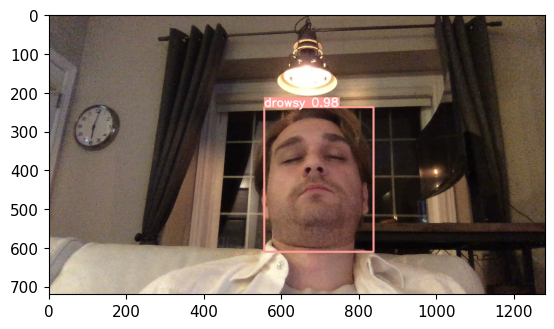

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model_2(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()

### **`Loading Second Custom Trained Model`**

Despite training on ~140 images of each class, this model we feel suffers from overfitting - it correctly detects training images but fails on new images (particularly when using camera) where it detects everything as drowsy. 

This may be an issue of training images being too close to one another (in likeness).

In [47]:
model_3 = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/oscaramirmansour/AwakeDrowsyObjDetec/yolov5/runs/train/exp9/weights/last.pt')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [5]:
img4 = os.path.join('data', 'images', 'awake.669de2ea-8a54-11ee-b275-784f434cfd22.jpg')

In [42]:
results = model_3(img4)

print(results)

image 1/1: 720x1280 1 awake
Speed: 44.6ms pre-process, 348.2ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


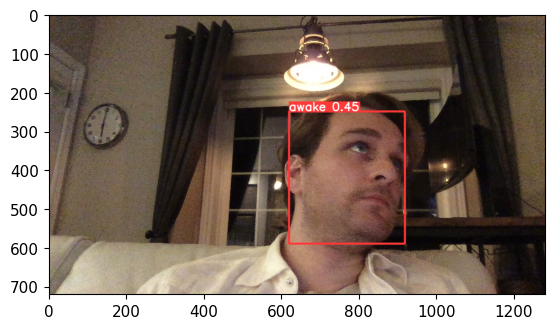

In [43]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model_3(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()

### **`Training a Third Model`**

In [1]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 30 --data /Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=35, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.11.6 torch-2.1.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

Lets test the model

In [4]:
model_4 = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/oscaramirmansour/AwakeDrowsyObjDetec/yolov5/runs/train/exp10/weights/last.pt')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model_4(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()

Still not performant - failing to properly detect when im awake vs drowsy and if it does detect awake, it does so with a weak confidence... maybe lets try augmenting the current images

### **`Training a Fourth Model`**

In [35]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 30 --data /Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/Users/oscaramirmansour/AwakeDrowsyObjDetec/Pytorch/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-245-g3d8f004 Python-3.11.6 torch-2.1.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=

### Let's load the new model in

In [2]:
model_5 = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/oscaramirmansour/AwakeDrowsyObjDetec/yolov5/runs/train/exp11/weights/last.pt')

Using cache found in /Users/oscaramirmansour/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-21 Python-3.11.6 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


### Test it out on live camera feed..

In [ ]:
# Real time detection using OpenCV - VideoCapture(0) for camera, otherwise specify video or image
cap = cv2.VideoCapture(0)

while cap.isOpened(): # while capture device is open
    ret, frame = cap.read() # reading capture and unpacking the return value and frame

    results = model_5(frame) # make detections - passing through frame from video capture to model


    cv2.imshow('YOLO', np.squeeze(results.render())) # squeezing out results from np array and passing it to rendering function

    if cv2.waitKey(10) & 0xFF == ord('q'): # if q is pressed then exit loop
        break

cap.release()
cv2.destroyAllWindows()